<a href="https://colab.research.google.com/github/YuTTsai/S10755018-Sort/blob/master/1223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#最大團問題=最大完全子圖問題（Maximum Clique Problem, MCP）

#參考資料:
1.演算法筆記 - Complete Graph。2020年12月23日。取自
http://web.ntnu.edu.tw/~algo/CompleteGraph.html 。

2.tmt's blog - 圖論演算法 7 - 完全子圖 Cliques。2020年12月23日。取自
https://tmt514.github.io/algo/algorithmic-graph-theory/cliques 。

3.最大团问题_百度百科。2020年12月23日。取自
https://baike.baidu.com/item/%E6%9C%80%E5%A4%A7%E5%9B%A2%E9%97%AE%E9%A2%98/7648036 。

4.类动态规划求解较小规模的最大团问题（Python实现）_CODE and POEM-CSDN博客_最大团python。2020年12月23日。取自
https://blog.csdn.net/hahajinbu/article/details/53818662 。

5.完全圖 - 維基百科，自由的百科全書。2020年12月23日。取自
https://zh.wikipedia.org/wiki/%E5%AE%8C%E5%85%A8%E5%9C%96 。

6.圖 (數學) - 維基百科，自由的百科全書。2020年12月23日。取自
https://zh.wikipedia.org/wiki/%E5%9B%BE_(%E6%95%B0%E5%AD%A6)#%E6%9C%89%E5%90%91%E5%9B%BE%E5%92%8C%E7%84%A1%E5%90%91%E5%9B%BE 。

7.最大派系問題| 遞歸解決方案-GeeksforGeeks。2020年12月23日。取自
https://www.geeksforgeeks.org/maximal-clique-problem-recursive-solution/ 。

8.陳士杰。演算法課程(Algorithms)Course 9 NP Theory序論An Introduction to the Theory of NP。2020年12月26日。取自http://debussy.im.nuu.edu.tw/sjchen/Algorithm/97Spring/Course09.pdf 。

#屬於哪種問題?
NP-C問題[3]

#介紹&說明:
最大完全子圖問題是圖論中的最優化問題，是NP-C問題。[3]


**最大完全子圖問題:在無向圖中找出擁有最多點的完全圖**[3]


無向圖:看不出繪圖順序的圖/沒有箭頭的圖[6]

完全圖:簡單的無向圖，每一對點(任意兩點)都能找到一條邊相連。[5]

  -->一個圖形中有很多點，某些點相連，在那之中找到每一個點都必須連到每一個其他點的最大圖形並計算最大的點數就是最大團=最大完全子圖。[1][2]

  -->最大完全子圖的任意一對點都必須存在一條線。[2]

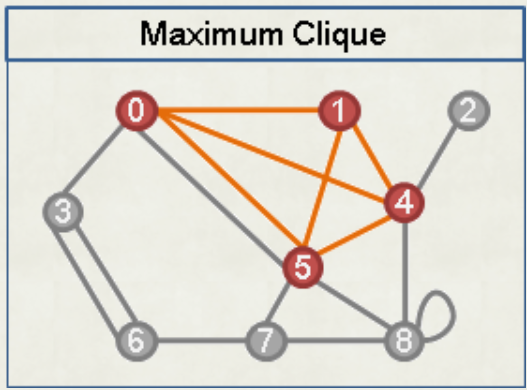
圖1 Maximum Clique[1]

(圖中橘色部分為最大團)

通常以w(G)表示符合條件得最大點數。[2]

例如上圖中有9個點，最多只能找到四個點它們彼此之間都存在一條線，最大點數=4。


相關名詞:

極大團 Maximal Clique ：無法再添加點的團。[1]

最大團 Maximum Clique ：點最多的團。[1]


#可運用在:
市場分析，方案選擇，信號傳輸，計算機視覺，故障診斷...領域。[3]

#常用算法有:
遺傳算法(Genetic Algorithm)、禁忌算法(Tabu Algorithm)、模擬退火算法(Simulated Annealing)、回溯法(BacktrackingAlgorithm)、分支限界法(BranchandBound)...等。[3]

#證明最大團問題為NPC問題
在此證明"分團"問題為NPC問題。

假設以之3-SAT問題為NPC問題。[8]
存在一個函數F(x)可滿足3-SAT問題。

#Bron–Kerbosch 演算法-證明:

R: 目前的團(Clique)。[1]

P: 可以增大目前團(Clique)的點集合。接下來要列舉的點。
　（與目前團(Clique)上所有點皆相鄰的點構成的集合）[1]

X: 可以增大目前團(Clique)的點集合，避免重複。[1]

選擇適當的點，讓列舉的點變少，時間複雜度加速為 O(3n/3) 。[1]


使用 Pivot 的 B-K 演算法滿足遞迴式T(n)=maxk{KT(n-k)}+O(n^2)其中 n=｜P｜ 。[2]

令k=｜P\Γ(u)｜。
 如果挑選的u=argmaxv∈PUX｜P∩Γ(v)｜ ，那麼每一次遞迴呼叫保證有｜P∩Γ(v)｜<=n-k 。[2]
 
 因此最壞情況下遞迴所需要的時間是maxk{KT(n-k)} 。[2]
 
 找出 Pivot 可以在 O(n^2) 時間內完成。[2]

遞迴式解是T(n)=O(n^n/3)[2]

#程式使用遞迴解[7]



In [ ]:
#https://www.geeksforgeeks.org/maximal-clique-problem-recursive-solution/
# Python3 implementation of the approach 
MAX = 100; 
n = 0; 
  
# Stores the vertices 存儲點
store = [0] * MAX; 
  
# Graph 圖圖
graph = [[0 for i in range(MAX)] for j in range(MAX)]; 
  
# Degree of the vertices 點的數量?
d = [0] * MAX; 
  
# Function to check if the given set of 檢查一個給定的函數
# vertices in store array is a clique or not 存在array中的點是否成團
def is_clique(b): 
  
    # Run a loop for all set of edges  為所有的邊設循環
    for i in range(1, b): #1-b --> 1-1 1-2 1-3...
        for j in range(i + 1, b): #設i=1 0-b
  
            # If any edge is missing  如果缺少任何邊
            if (graph[store[i]][store[j]] == 0): # ==0 就是沒有邊 
                return False; #回傳False 跳出此迴圈 回到for i in range(1, b):
      
    return True; #回傳True 
  
# Function to find all the sizes 找到函數的所有邊數(size)
# of maximal cliques  極大團 Maximal Clique ：無法再添加點的團。
def maxCliques(i, l): 
  
    # Maximal clique size 極大團中最多的點數=的點數= max_
    max_ = 0; 
  
    # Check if any vertices from i+1  檢查任何來自i+1的點
    # can be inserted 
    for j in range(i + 1, n + 1):  #1-5
  
        # Add the vertex to store  加存儲點
        store[l] = j; 
  
        # If the graph is not a clique of size k then 如果圖不是大小為k的集團，
        # it cannot be a clique by adding another edge 不能透過添加另一條邊成為集團
        if (is_clique(l + 1)): 
  
            # Update max 更新max值
            max_ = max(max_, l); 
  
            # Check if another edge can be added 檢查是否可以添加另一個邊
            max_ = max(max_, maxCliques(j, l + 1)); 
          
    return max_; #回傳最大邊數
      
# Driver code 
if __name__ == '__main__': 
    edges = [[ 1, 2 ],[ 2, 3 ],[ 3, 1 ],    #相連的邊
           [ 4, 3 ],[ 4, 1 ],[ 4, 2 ]]; 
    size = len(edges); #線的數量
    n = 4; #點的數量
  
    for i in range(size):   
        graph[edges[i][0]][edges[i][1]] = 1;  #graph的表示法representation http://alrightchiu.github.io/SecondRound/graph-introjian-jie.html
        graph[edges[i][1]][edges[i][0]] = 1;  #一個二維矩陣，若2點有邊，則矩陣位置[A][B]值為1，反之，則為0。 http://alrightchiu.github.io/SecondRound/graph-introjian-jie.html
        d[edges[i][0]] += 1; 
        d[edges[i][1]] += 1; 
      
    print("最大完全子圖點數:"+ str(maxCliques(0, 1))); #執行印出最大完全子圖的點數
  
# This code is contributed by PrinciRaj1992 

最大完全子圖點數:4
